# Third Case Study: Event-News Careers in the United States

In [1]:
import pandas as pd 
import scipy.stats  as stats
import numpy as np 
import seaborn as sns 
import glob
import urllib, json
sns.set_style('whitegrid')

from matplotlib import pyplot as plt 

In [11]:
# Load GKG data
files = glob.glob('data/ts_gkg*')
dfs = []
for file in files:
    dfs.append(pd.read_pickle(file))
gkg = pd.concat(dfs)

In [13]:
# Load Event data and match with GKG records
files = glob.glob('data/ts_events*')
dfs = []
for file in files:
    dfs.append(pd.read_pickle(file))
events = pd.concat(dfs).set_index('date').sort_index()
events['location'] = events['location'].astype(str)
events = events[events['location'] != 'nan']
events['US'] = events.location.apply(lambda x: x.find('US'))
events = events[events.US != -1]
events = events[events.url.isin(gkg.url)]

In [15]:
# Resample and combine gkg and event data
events = events.resample('1D').count()['event_id']
gkg = gkg.resample('1D').count()['id']
combined = pd.concat([events,gkg],axis=1)
combined = combined.rename(columns={'id':'ImmigrationDiscussions','event_id':"ProtestEvents"})

In [16]:
# z-transform counts
combined['ImmigrationDiscussions'] = ( (combined['ImmigrationDiscussions'] - combined['ImmigrationDiscussions'].mean()) / combined['ImmigrationDiscussions'].std() )
combined['ProtestEvents'] = ( (combined['ProtestEvents'] - combined['ProtestEvents'].mean()) / combined['ProtestEvents'].std() )
combined = combined.fillna(0)

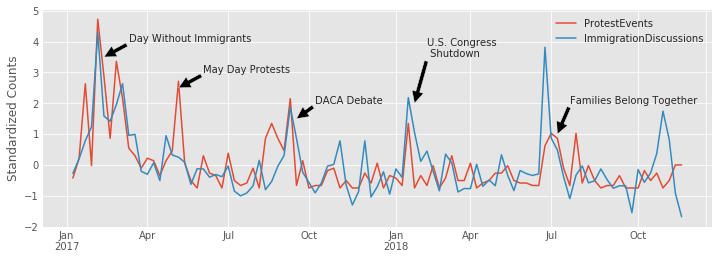

In [9]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,4))
combined.plot(ax=ax)

ax.annotate('Day Without Immigrants', xy=('2017-02-7', 3.5), xytext=('2017-03-10',4), 
            arrowprops=dict(facecolor='black', shrink=0.0))

ax.annotate('May Day Protests', xy=('2017-05-07', 2.5), xytext=('2017-6-1', 3), 
            arrowprops=dict(facecolor='black', shrink=0.0))

ax.annotate('DACA Debate', xy=('2017-09-12', 1.5), xytext=('2017-10-5', 2), 
            arrowprops=dict(facecolor='black', shrink=0.0))

ax.annotate('U.S. Congress\n Shutdown', xy=('2018-01-23', 2), xytext=('2018-02-10', 3.5), 
            arrowprops=dict(facecolor='black', shrink=0.0))

ax.annotate('Families Belong Together', xy=('2018-07-3', 1), xytext=('2018-07-20', 2), 
            arrowprops=dict(facecolor='black', shrink=0.0))

plt.xlabel('')
plt.ylabel('Standardized Counts')
plt.savefig('plots/protests.ts.png', dpi=300)

#### Coding of Events for Interventions in Transfer Functions

In [17]:
# NOTE: Load data above and resample to Weekly or Daily level before executing this cell!
# Daily
combined.at['2017-01-21', 'protest_nation_against_trump'] = 1
combined.at['2017-01-22', 'protest_nation_against_trump'] = 1

combined.at['2017-02-05', 'protest_travel_ban'] = 1
combined.at['2017-02-06', 'protest_travel_ban'] = 1
combined.at['2017-02-07', 'protest_women_march'] = 1
combined.at['2017-02-21', 'protest_against_inaug'] = 1
combined.at['2017-02-26', 'protest_million_hoodie_march'] = 1

combined.at['2017-05-02', 'protest_may_day'] = 1
combined.at['2017-08-17', 'protest_charlottesville'] = 1
combined.at['2017-08-22', 'protest_tear_gas'] = 1
combined.at['2017-08-20', 'protest_phoenix'] = 1
combined.at['2017-09-05', 'protest_daca'] = 1
combined.at['2017-09-06', 'protest_daca'] = 1


combined.at['2018-06-26', 'protest_fam_together'] = 1
combined.at['2018-07-02', 'protest_fam_together'] = 1
combined.at['2018-07-26', 'protest_fam_together'] = 1

combined.at['2017-09-07', 'other_tweet_daca'] = 1
combined.at['2017-06-18', 'other_tweet_change_laws'] = 1
combined.at['2018-10-18', 'other_tweet_migrant_caravan'] = 1

combined.at['2018-01-20', 'other_shutdown'] = 1
combined.at['2018-02-12', 'other_senate_debate'] = 1
combined.at['2018-11-06', 'other_midterms'] = 1

combined = combined.reset_index()
combined['date'] = pd.to_datetime(combined.date)
combined = combined.set_index('date')
combined = combined.sort_index()

prot_cols = [c for c in combined.columns if c.startswith('protest_')]
combined['all_protests'] = combined[prot_cols].sum(axis=1)
combined['dummy_all_protests'] = combined['all_protests'].apply(lambda x: 1 if (x > 0) else 0)
del combined['all_protests']

other_cols = [c for c in combined.columns if c.startswith('other_')]
combined['other_events'] = combined[other_cols].sum(axis=1)
combined['dummy_all_other'] = combined['other_events'].apply(lambda x: 1 if (x > 0) else 0)
del combined['other_events']

combined = combined.fillna(0).sort_index()
combined.to_csv('data/timeseries_daily.csv')

In [10]:
# NOTE: Load data above and resample to Weekly or Daily level before executing this cell!
# Weekly
combined.at['2017-01-22', 'protest_nation_against_trump'] = 1
combined.at['2017-02-05', 'protest_travel_ban'] = 1
combined.at['2017-02-12', 'protest_day_without_imm'] = 1
combined.at['2017-03-05', 'protest_march4trump'] = 1
combined.at['2017-05-07', 'protest_may_day'] = 1
combined.at['2017-08-20', 'protest_phoenix'] = 1
combined.at['2017-09-10', 'protest_daca'] = 1
combined.at['2018-07-01', 'protest_fam_together'] = 1
combined.at['2018-07-29', 'protest_fam_together'] = 1

combined.at['2017-09-07', 'other_tweet_daca'] = 1
combined.at['2017-06-18', 'other_tweet_change_laws'] = 1
combined.at['2018-10-18', 'other_tweet_migrant_caravan'] = 1

combined.at['2018-01-21', 'other_shutdown'] = 1
combined.at['2018-02-12', 'other_senate_debate'] = 1
combined.at['2018-11-06', 'other_midterms'] = 1

combined = combined.reset_index()
combined['date'] = pd.to_datetime(combined.date)
combined = combined.set_index('date')
combined = combined.sort_index()

prot_cols = [c for c in combined.columns if c.startswith('protest_')]
combined['all_protests'] = combined[prot_cols].sum(axis=1)
combined['dummy_all_protests'] = combined['all_protests'].apply(lambda x: 1 if (x > 0) else 0)
del combined['all_protests']

other_cols = [c for c in combined.columns if c.startswith('other_')]
combined['other_events'] = combined[other_cols].sum(axis=1)
combined['dummy_all_other'] = combined['other_events'].apply(lambda x: 1 if (x > 0) else 0)
del combined['other_events']

combined = combined.fillna(0).sort_index()
combined.to_csv('data/timeseries_weekly.csv')